# Dashboard Metrics

- **Early Education and Sense of Belonging** - Bubble plot of years in early education vs sense of belonging - each bubble for number of country submissions

- **Number of Submissions** - Running Count Across All Countries

- **Number of Submissions Over Time** - Moving Line Chart Counting Only Submissions received in each hour

- **Learning Hours Per Week** - Average learning hours per week per country

- **Economic, Social, and Cultural Score** - Each countries ESCS score made of combining `PARED` (Perental Schooling), `HISEI` (Highest Occupation of Parent), and `HOMEPOS` (Wealth based on Home Possessions) values

## Early Education and Sense of Belonging
Bubble plot of years in early education vs sense of belonging - each bubble represents number of country submissions

![eeb_bubble_plot](../images/eeb_bubble_plot.png)

### Approach
- Years in early education: DURECEC 
- Sense of belonging: BELONG +ve = More belonging than average -ve less than average

To get x & y values:
`SELECT belong, durecec FROM responses`

To get count of submissions:
`SELECT COUNT(*) as submissions`

## Number of Submissions
Running count of submissions across all countries

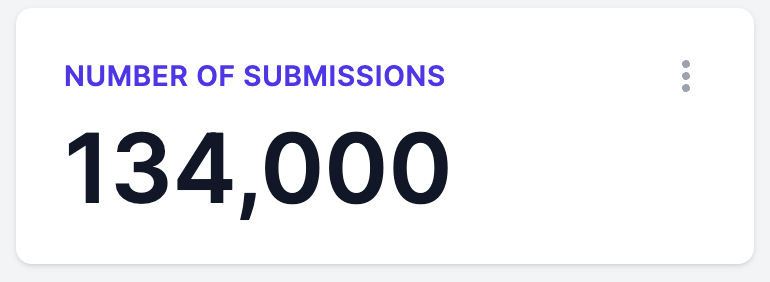

### Approach

`SELECT COUNT(*) FROM pisa`


## Number of Submissions Over Time
Moving line chart counting only submissions received in the past 24 hours, grouped by hour.



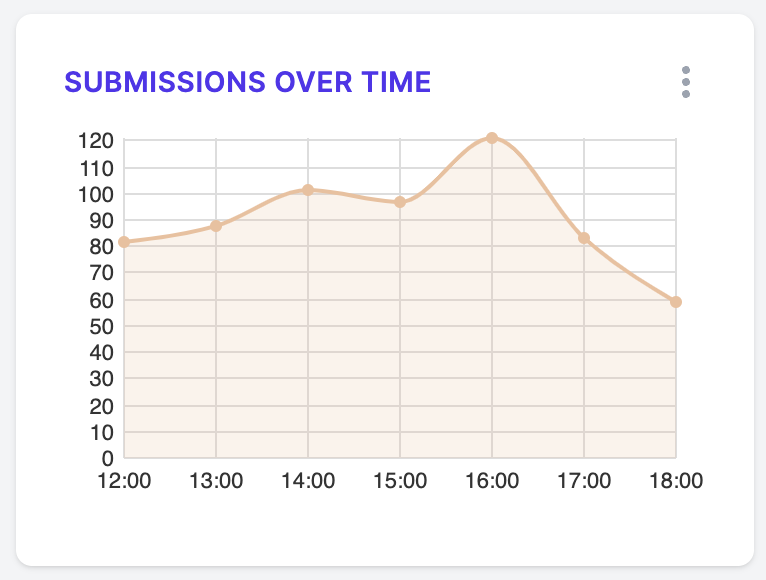

### Approach
Filter to only see submissions made in the past 24 hours:

`start_time = datetime.now() - timedelta(hours=24)`

Count submissions and group by hour:

`"SELECT to_char(time_submitted, 'HH24:00') AS hour, COUNT(*) AS entry_count FROM pisa WHERE time_submitted >= %s GROUP BY hour ORDER BY hour;",
        (start_time,)`

## Learning Hours per Week
Number of teaching hours per week
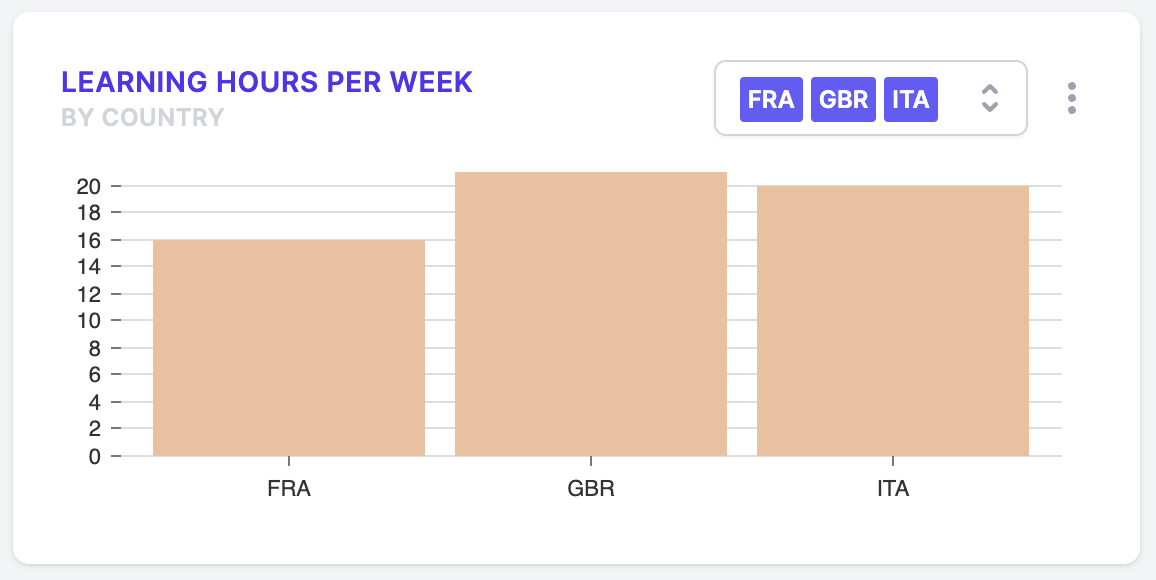

### Approach
`TMINS` (Total minutes in learning week) averaged across the country, to be converted into hours for the dashboard:

`SELECT cnt, AVG(tmins/60) AS avg_hours_per_week FROM pisa WHERE tmins IS NOT NULL GROUP BY cnt ORDER BY avg_hours_per_week DESC;`

`TMINS` is calculated taking the INT value of `ST061` (average class length in minutes) and multiplying it by `ST060` the number of class periods 

## Economic, Social, and Cultural Score
World Map chart displaying cultural scores
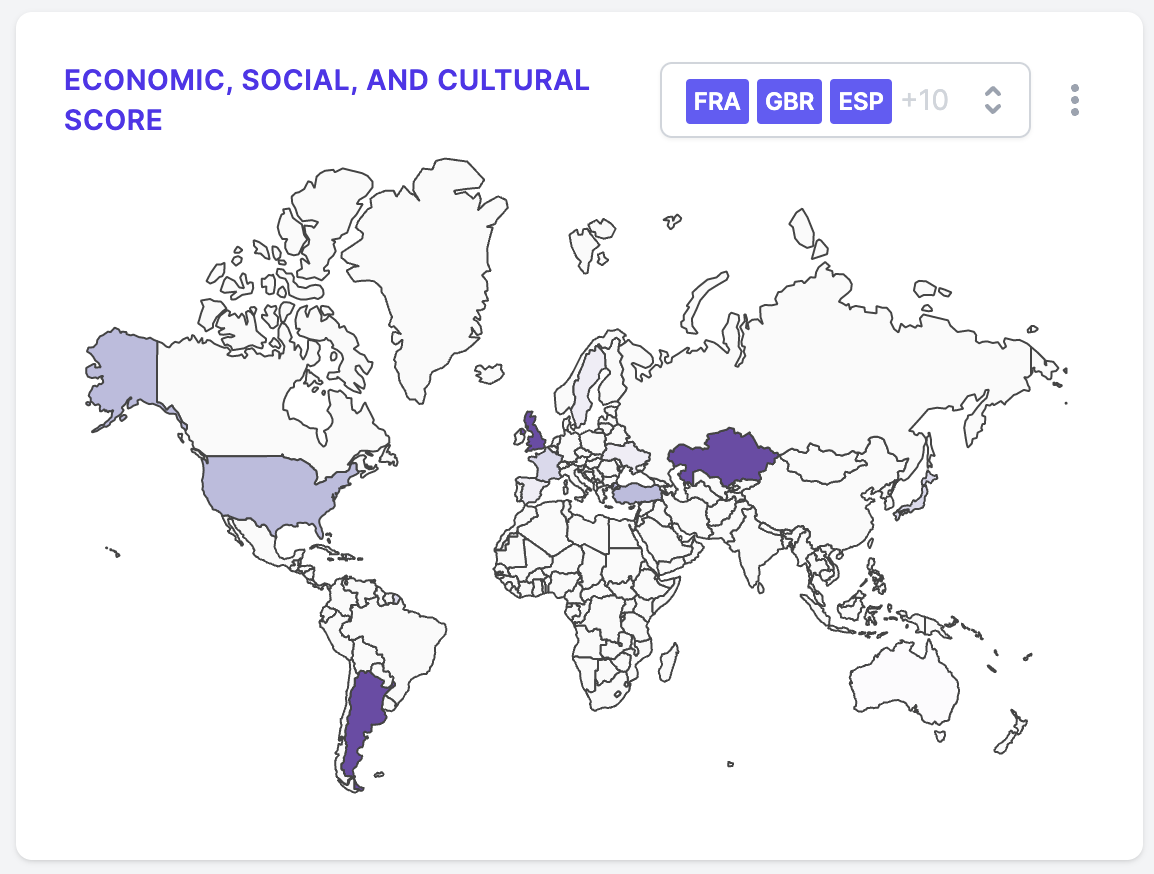

### Approach
Each countries `ESCS` score, which is comprised of:

- `PARED` - Parental Schooling
- `HISEI` - Highest Occupation of Parent
- `HOMEPOS` - Wealth based on Home Possessions

Extract ESCS score and group by country:

`SELECT cnt, AVG(escs) FROM pisa WHERE escs IS NOT NULL GROUP BY cnt;`


### Values Required from Raw Data & Their Data Types

- escs `NUMERIC(15, 4)`
- tmins `INT`
- belong `NUMERIC(15, 4)`
- durecec `INT`
- cnt `TEXT`